# Artificial Neural Network - MNIST
## Reconocimiento de digitos

### Inicialización

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Preprocesamiento de datos

Se utiliza el [MNIST digits classification dataset](http://yann.lecun.com/exdb/mnist/). Este conjunto de datos contiene 70,000 imágenes de 28x28 píxeles en escala de grises de digitos escritos a mano (0-9) con su etiqueta.

El siguiente código carga y divide automáticamente los datos en un conjunto de entrenamiento (train_images, train_labels) con 60,000 datos y un conjunto de prueba (test_images, test_labels) con los restantes 10,000 datos.

In [8]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']
print('train_images:', train_images.shape)
print('train_labels:', len(train_labels))
print('test_images:', test_images.shape)
print('test_labels:', len(test_labels))

train_images: (60000, 28, 28)
train_labels: 60000
test_images: (10000, 28, 28)
test_labels: 10000


A continuación se muestran alguns de las imágenes del conjunto de datos con su respectiva etiqueta de clasificación.

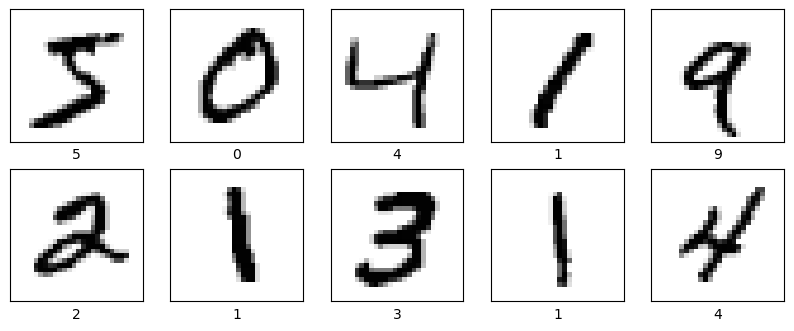

In [9]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Red Neuronal Artificial

El modelo secuencial se define de la siguiente manera:
1. Se añade una capa de entrada **Flatten** (input_shape = [28, 28] que corresponde al tamaño de las imágenes).
2. Se añaden capas escondidas **Dense** especificando el número neuronas (units) y utiliza una función de activación relu.
3. Se añade la última capa con el número de clases de clasificación existentes utilizando una función de activación softmax.

In [29]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.7044 - loss: 3.9958 - val_accuracy: 0.8778 - val_loss: 0.5292
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.8894 - loss: 0.4122 - val_accuracy: 0.9121 - val_loss: 0.3733
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.9298 - loss: 0.2669 - val_accuracy: 0.9418 - val_loss: 0.2193
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.9482 - loss: 0.1892 - val_accuracy: 0.9399 - val_loss: 0.2189
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step - accuracy: 0.9549 - loss: 0.1592 - val_accuracy: 0.9530 - val_loss: 0.1815
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.9608 - loss: 0.1415 - val_accuracy: 0.9589 - val_loss: 0.1564
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.9662 - loss: 0.1184 - val_accuracy: 0.9581 - val_loss: 0.1664
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step - accuracy: 0.9687 -

### Visualización de precisión

Se genera un gráfico comparativo entre la precisión del conjunto de datos de entrenamiento y el de prueba. Se espera obtener una alta precisión para ambos conjuntos de datos. Si la precisión para los datos de entrenamiento es mucho más elevada, entonces, el modelo puede estar sobreentrenado (overfit). Si la precisión sobre ambos conjuntos de datos es similar, entonces, el modelo es capaz de generalizar adecuadamente sobre nuevos casos que se presenten más adelante.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


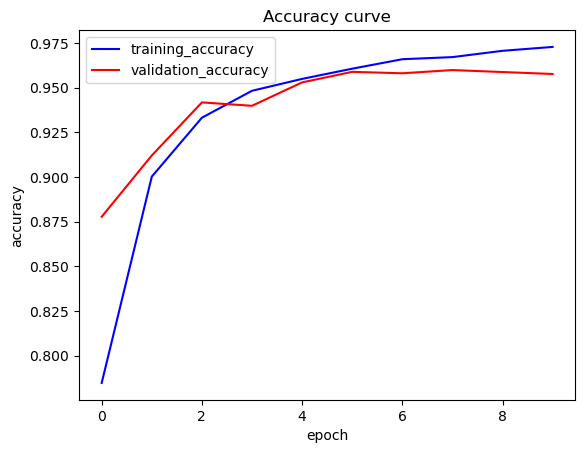

In [33]:
print(training.history.keys())
x = np.arange(0, len(training.history['accuracy']), 1)
plt.plot(x, training.history['accuracy'], '-', color='blue', label='training_accuracy')
plt.plot(x, training.history['val_accuracy'], '-', color='red', label='validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.title("Accuracy curve")
plt.show()

### Predicción de resultados

El código siguiente muestra las primeras 10 imágenes del conjunto de prueba y despliega la etiqueta real junto con la predicción del modelo de Red Neuronal Artificial. Las predicciones correctas se marcan con una etiqueta (label) verde, mientras que las predicciones erróneas aparecen en rojo.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step


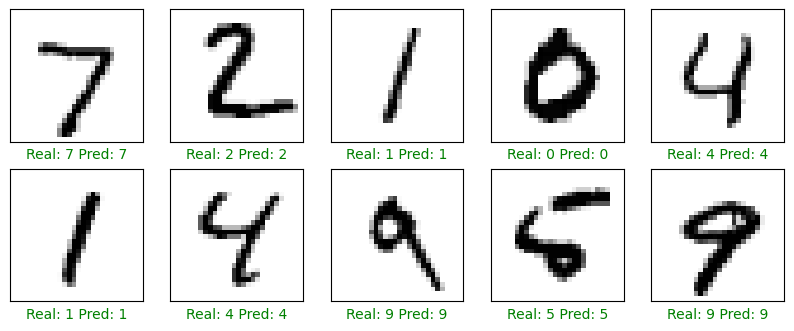

In [34]:
predictions = model.predict(test_images)
correct = {'color':  'green'}
incorrect = {'color':  'red'}
plt.figure(figsize=(10,10))
results = []
for i in range(10):
    results.append(True if test_labels[i] == np.argmax(predictions[i]) else False)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Real: {test_labels[i]} Pred: {np.argmax(predictions[i])}',
               fontdict = correct if test_labels[i] == np.argmax(predictions[i]) else incorrect)
plt.show()